<a href="https://colab.research.google.com/github/KumarGaurav20/ML-HOMEWORK/blob/main/03_ML_TUT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Tutorial 01
The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data.

## Instructions:



1. Find independent variable and dependent variable in given dataset.
2. Implement linear regression in Colab.
3. Find regression line that best predicts value of dependent variable.
4. Find SST, SSE, SSR and co-efficient of determination (R2).
5. Explain pictorial relationship between SST, SSE, SSR.
6. Decide whether regression equation is good fit or not for the given sample data

NOTEBOOK IMPORTS

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

Mounted at /content/gdrive


Constants

In [12]:
X_= 'No of hours driving'
y_= 'Risk Score on a Scale of 0-100'

1.READING DATA

In [10]:
data = pd.read_csv('/content/ML_TUT1.csv')
data

,X,y
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45
5,16,98
6,11,38
7,16,93


In [11]:
data.describe()

,X,y
count,8.000000,8.000000
mean,11.125000,63.625000
std,4.673252,32.429869
min,2.000000,10.000000
25%,9.750000,43.250000
50%,10.500000,65.000000
75%,15.250000,93.500000
max,16.000000,98.000000


Determining which one is the dependent variable
From the above dataset it is very well evident that 'y' is the dependent variable, since it is a score of how severe the pain can turn out to be after driving 'x' number of hours, therefore, it is safe to say that 'y' is dependent on 'x' and exhibits a linear relationship.

2- Implementing Linear Relation

In [13]:
# Converting the columns into individual dataframes
X = DataFrame(data, columns = ['X'])
y = DataFrame(data, columns = ['y'])

In [14]:
X

,X
0,10
1,9
2,2
3,15
4,10
5,16
6,11
7,16


In [15]:
y

,y
0,95
1,80
2,10
3,50
4,45
5,98
6,38
7,93


VISUALIZATION

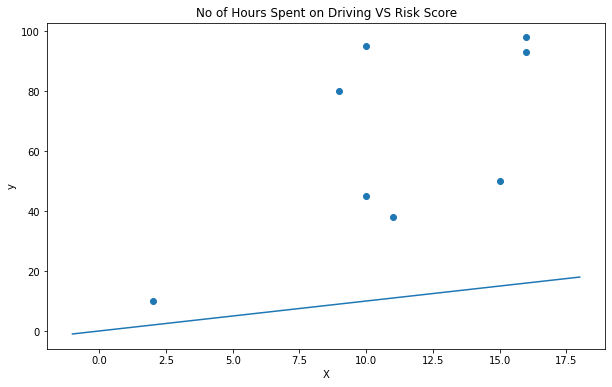

In [25]:
plt.figure(figsize=(10, 6))
line= np.linspace(-1,18, 100)
plt.title('No of Hours Spent on Driving VS Risk Score')
plt.plot(line, line)
plt.scatter(X, y) 
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [27]:
regr = LinearRegression()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print(f'The regression coefecient is:{regr.coef_}')

The regression coefecient is:[[4.11803279]]


In [34]:
print(f'The regression intercept is:{regr.intercept_}')

The regression intercept is:[14.4852459]
